In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), './Advanced-DeepLearning-Keras'))
	print(os.getcwd())
except:
	pass


/home/mainak/git/Advanced-DeepLearning-Keras


In [2]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K

Using TensorFlow backend.


In [3]:
dataPath = '/tmp/dataset/belgium_tsc'

In [4]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                       if os.path.isdir(os.path.join(data_dir, d))]

    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                          for f in os.listdir(label_dir) 
                              if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels # these provide you data in numpy arrays

In [5]:
train_data_dir = os.path.join(dataPath, "Training")
train_images, train_labels = load_data(train_data_dir)

In [6]:
test_data_dir = os.path.join(dataPath, "Testing")
test_images, test_labels = load_data(test_data_dir)

In [7]:
def find_label_name(x):
    if x in [2,3,4,7,8,9,10,12,13,15,17,18,22,26,27,28,29,34,35]: 
        return "triangles"
    elif x in [36,43,48,50,55,56,57,58,59,61,65]: 
        return "redcircles"
    elif x in [72,75,76,78,79,80,81]: 
        return "bluecircles"
    elif x in [82,84,85,86]: 
        return "redbluecircles"
    elif x in [32,41]: 
        return "diamonds"
    elif x in [31]: 
        return "revtriangle"
    elif x in [39]: 
        return "stop",
    elif x in [42]: 
        return "forbidden"
    elif x in [118,151,155,181]: 
        return "squares"
    elif x in [37,87,90,94,95,96,97,149,150,163]:
        return "rectanglesup"
    elif x in [111,112]:
        return "rectanglesdown"
    else:
        return "undefined"

In [8]:
def display_images_and_labels(images64, labels, cmap='jet', channel=3):
    fig = plt.figure(figsize=(15,15))
    for i in range(20):
        index = np.random.randint(0, 1000)    
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        if channel == 3:
            plt.imshow(images64[index][:,:,:], cmap=cmap, interpolation=None)
        else:
            plt.imshow(images64[index][:,:,channel], cmap=cmap, interpolation=None)
        plt.title('Label: {} ({})'.format(labels[index], find_label_name(labels[index])))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [9]:
train_images[1][:,:,1]
# Resize images
train_images64 = [skimage.transform.resize(image, (64, 64), mode='constant')
                for image in train_images]

In [10]:
test_images64 = [skimage.transform.resize(image, (64, 64), mode='constant')
                for image in test_images]

In [11]:
def remove_undefined(images, labels):
    x = []
    y = []
    for i in labels:
        if find_label_name(i) != 'undefined':
            x.append(images[i])
            y.append(labels[i])
    return np.asarray(x), np.asarray(y)

In [12]:
x_train, y_train = remove_undefined(train_images64, train_labels)
print('Shape x: {}, y: {}'.format(x_train.shape, y_train.shape))

Shape x: (2660, 64, 64, 3), y: (2660,)


In [13]:
x_test, y_test = remove_undefined(test_images64, test_labels)
print('Shape x: {}, y: {}'.format(x_test.shape, y_test.shape))

Shape x: (1698, 64, 64, 3), y: (1698,)


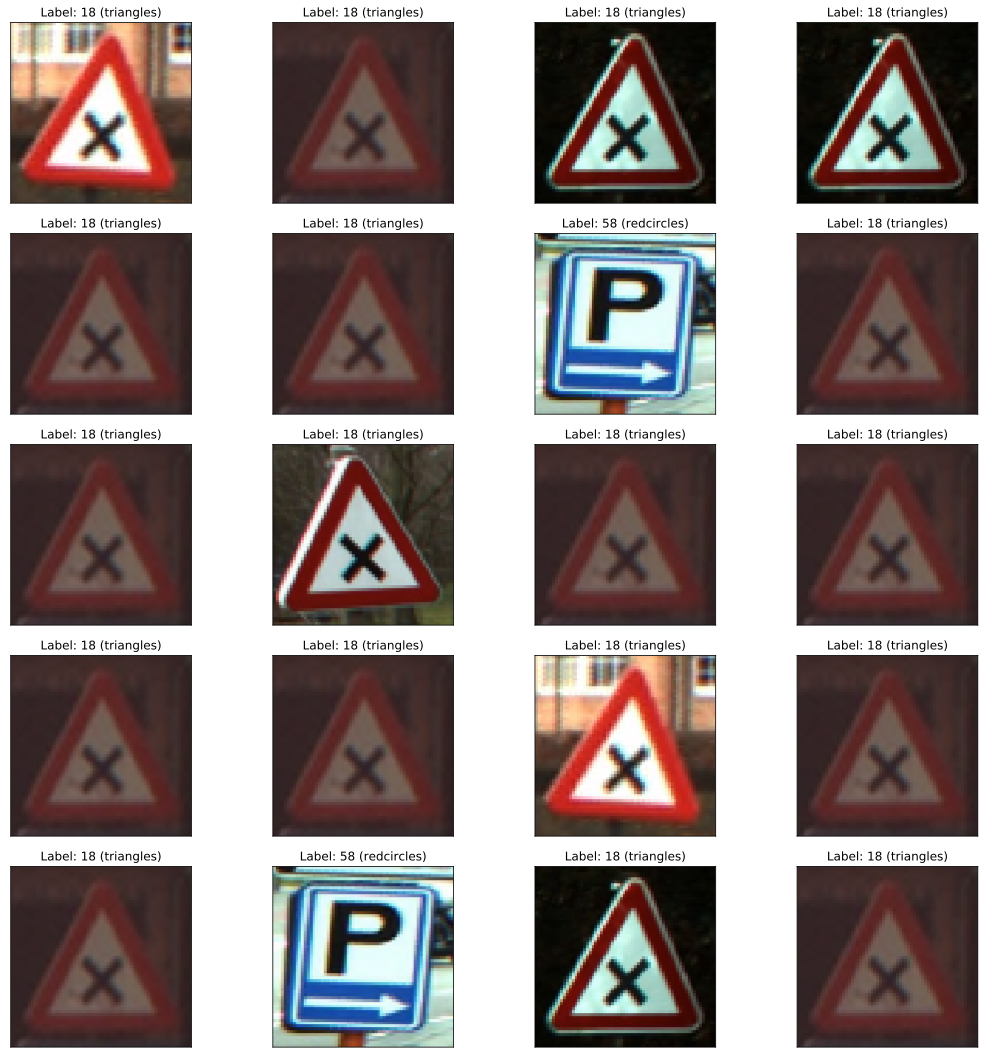

In [14]:
display_images_and_labels(x_test, y_test)

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_train_cat = enc.fit_transform(y_train.reshape(-1,1))
y_test_cat = enc.transform(y_test.reshape(-1,1))

In [16]:
y_train_cat.toarray()
y_test_cat.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [17]:
'''Normalize data'''
pixcel_depth = 255
x_train = x_train.astype('float32') / pixcel_depth
x_test = x_test.astype('float32') / pixcel_depth

'''Improving Accuracy'''
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

In [18]:
import importlib
resnet = importlib.import_module('ResNet')

In [19]:
depth = lambda ResNetVersion, N: N * 6 + 2 if ResNetVersion == 1 else N * 9 + 2

In [20]:
model = resnet.ResNet.V2(input_shape=x_train.shape[1:], depth=depth(2, 3), num_classes=3)
model.summary()

W0721 21:47:48.110517 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 21:47:48.123670 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 21:47:48.126803 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0721 21:47:48.154403 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0721 21:47:48.154985

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [21]:
from keras.utils import plot_model
from keras.optimizers import Adam
metric = importlib.import_module('Metric')

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(resnet.ResNet.lr_schedule(0)),
              metrics=['accuracy', metric.Metric.F1])
plot_model(model, to_file="Traffic_ResNetV2.png", show_shapes=True)

W0721 21:47:55.949239 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Learning Rate:  0.001


In [22]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Traffic_ResNetV2_model.{epoch:03d}.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, TensorBoard

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(resnet.ResNet.lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

early_stopping = EarlyStopping(monitor='val_acc', patience=5)
tensor_board = TensorBoard(log_dir='/tmp/log_dir', histogram_freq=0, write_graph=True, write_images=True)

callbacks = [checkpoint, lr_reducer, lr_scheduler, early_stopping, tensor_board]

In [24]:
batch_size = 140
epoch = 20

In [25]:
model.fit(x_train, y_train_cat.toarray(),
          batch_size=batch_size,
          epochs=epoch,
          #validation_split=0.2,
          validation_data = (x_test, y_test_cat.toarray()),
          verbose=1,
          shuffle=True,
          callbacks=callbacks)

W0721 21:48:24.928733 139721106351936 deprecation.py:323] From /home/mainak/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 21:48:31.779475 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0721 21:48:31.780436 139721106351936 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 2660 samples, validate on 1698 samples


Epoch 1/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 2:42 - loss: 1.9816 - acc: 0.3786 - F1: 0.3786

 280/2660 [==>...........................] - ETA: 2:09 - loss: 1.6827 - acc: 0.5250 - F1: 0.5395

 420/2660 [===>..........................] - ETA: 1:53 - loss: 1.5244 - acc: 0.6048 - F1: 0.5884

 560/2660 [=====>........................] - ETA: 1:40 - loss: 1.3963 - acc: 0.6982 - F1: 0.6639

 700/2660 [======>.......................] - ETA: 1:30 - loss: 1.3030 - acc: 0.7529 - F1: 0.7247

 840/2660 [========>.....................] - ETA: 1:21 - loss: 1.2386 - acc: 0.7821 - F1: 0.7615

 980/2660 [==========>...................] - ETA: 1:14 - loss: 1.1703 - acc: 0.8102 - F1: 0.7940

1120/2660 [===========>..................] - ETA: 1:06 - loss: 1.1203 - acc: 0.8304 - F1: 0.8161

1260/2660 [=============>................] - ETA: 1:00 - loss: 1.0727 - acc: 0.8484 - F1: 0.8358

1400/2660 [==============>...............] - ETA: 53s - loss: 1.0326 - acc: 0.8629 - F1: 0.8515 

1540/2660 [================>.............] - ETA: 47s - loss: 0.9993 - acc: 0.8747 - F1: 0.8647

1680/2660 [=================>............] - ETA: 41s - loss: 0.9697 - acc: 0.8851 - F1: 0.8759

1820/2660 [===================>..........] - ETA: 35s - loss: 0.9439 - acc: 0.8940 - F1: 0.8855

1960/2660 [=====================>........] - ETA: 29s - loss: 0.9219 - acc: 0.9015 - F1: 0.8934

2100/2660 [======================>.......] - ETA: 23s - loss: 0.9018 - acc: 0.9081 - F1: 0.9005

2240/2660 [========================>.....] - ETA: 17s - loss: 0.8843 - acc: 0.9138 - F1: 0.9067

2380/2660 [=========================>....] - ETA: 11s - loss: 0.8693 - acc: 0.9189 - F1: 0.9122

2520/2660 [===========================>..] - ETA: 5s - loss: 0.8554 - acc: 0.9234 - F1: 0.9171 

2660/2660 [==============================] - 126s 47ms/step - loss: 0.8431 - acc: 0.9274 - F1: 0.9215 - val_loss: 1.7252 - val_acc: 0.8587 - val_F1: 0.8587



Epoch 00001: val_acc improved from -inf to 0.85866, saving model to /home/mainak/git/Advanced-DeepLearning-Keras/saved_models/Traffic_ResNetV2_model.001.h5


Epoch 2/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:39 - loss: 0.6161 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.6205 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.6178 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.6157 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.6144 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.6132 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.6121 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.6122 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.6111 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.6102 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.6093 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.6084 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.6076 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.6070 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.6063 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.6056 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.6049 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.6042 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.6035 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.6412 - val_acc: 0.9859 - val_F1: 0.9859



Epoch 00002: val_acc improved from 0.85866 to 0.98587, saving model to /home/mainak/git/Advanced-DeepLearning-Keras/saved_models/Traffic_ResNetV2_model.002.h5


Epoch 3/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:39 - loss: 0.5887 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.5882 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.5876 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.5871 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.5866 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.5860 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.5854 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.5847 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.5841 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.5834 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.5828 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.5821 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.5814 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.5808 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.5802 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.5795 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.5788 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.5781 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.5774 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.7188 - val_acc: 0.9293 - val_F1: 0.9293



Epoch 00003: val_acc did not improve from 0.98587
Epoch 4/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:39 - loss: 0.5640 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.5630 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.5623 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.5617 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.5609 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.5602 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.5595 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.5587 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 55s - loss: 0.5580 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.5573 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.5567 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.5559 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.5552 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.5545 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.5538 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.5530 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.5523 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.5516 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.5508 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.6351 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00004: val_acc did not improve from 0.98587
Epoch 5/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.5364 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.5356 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.5350 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.5341 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.5333 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.5327 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.5320 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.5313 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.5305 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.5298 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.5290 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.5283 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.5275 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.5268 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.5260 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.5252 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.5245 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.5238 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.5230 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.5599 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00005: val_acc did not improve from 0.98587
Epoch 6/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.5082 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:32 - loss: 0.5075 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.5067 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.5059 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.5052 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.5045 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.5038 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.5031 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.5024 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.5016 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.5009 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.5001 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.4994 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.4987 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.4979 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.4972 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.4964 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.4957 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.4950 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.5138 - val_acc: 0.9859 - val_F1: 0.9859



Epoch 00006: val_acc did not improve from 0.98587
Epoch 7/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.4808 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.4798 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.4790 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.4782 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.4775 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.4767 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.4760 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.4754 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.4746 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.4739 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.4731 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.4724 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.4717 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.4709 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.4702 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.4695 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.4688 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.4681 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.4674 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4673 - val_acc: 0.9929 - val_F1: 0.9929



Epoch 00007: val_acc improved from 0.98587 to 0.99293, saving model to /home/mainak/git/Advanced-DeepLearning-Keras/saved_models/Traffic_ResNetV2_model.007.h5


Epoch 8/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.4530 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:32 - loss: 0.4524 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.4516 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.4509 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.4502 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.4495 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.4488 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.4481 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.4474 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.4467 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.4460 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.4453 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.4446 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.4439 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.4432 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.4425 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.4418 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.4411 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.4404 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4424 - val_acc: 0.9929 - val_F1: 0.9892



Epoch 00008: val_acc did not improve from 0.99293
Epoch 9/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.4266 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.4260 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.4253 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.4247 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.4240 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.4233 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.4226 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.4219 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.4212 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.4206 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.4199 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.4192 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.4185 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.4179 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.4172 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.4166 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.4159 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.4152 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.4145 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4307 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00009: val_acc did not improve from 0.99293
Epoch 10/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.4012 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:32 - loss: 0.4006 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.3999 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.3993 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.3986 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.3980 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.3973 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.3967 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.3961 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.3955 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.3949 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.3943 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.3936 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.3930 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.3924 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.3917 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.3911 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.3904 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 121s 45ms/step - loss: 0.3898 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4187 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00010: val_acc did not improve from 0.99293
Epoch 11/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:39 - loss: 0.3772 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.3765 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.3759 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.3753 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.3747 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.3741 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.3735 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.3729 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 55s - loss: 0.3723 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.3717 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 44s - loss: 0.3711 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.3705 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 33s - loss: 0.3699 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.3693 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 22s - loss: 0.3687 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.3681 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 11s - loss: 0.3675 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.3669 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 121s 46ms/step - loss: 0.3663 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4020 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00011: val_acc did not improve from 0.99293
Epoch 12/20
Learning Rate:  0.001


 140/2660 [>.............................] - ETA: 1:38 - loss: 0.3543 - acc: 1.0000 - F1: 1.0000

 280/2660 [==>...........................] - ETA: 1:33 - loss: 0.3538 - acc: 1.0000 - F1: 1.0000

 420/2660 [===>..........................] - ETA: 1:27 - loss: 0.3532 - acc: 1.0000 - F1: 1.0000

 560/2660 [=====>........................] - ETA: 1:22 - loss: 0.3526 - acc: 1.0000 - F1: 1.0000

 700/2660 [======>.......................] - ETA: 1:16 - loss: 0.3520 - acc: 1.0000 - F1: 1.0000

 840/2660 [========>.....................] - ETA: 1:11 - loss: 0.3515 - acc: 1.0000 - F1: 1.0000

 980/2660 [==========>...................] - ETA: 1:05 - loss: 0.3509 - acc: 1.0000 - F1: 1.0000

1120/2660 [===========>..................] - ETA: 1:00 - loss: 0.3503 - acc: 1.0000 - F1: 1.0000

1260/2660 [=============>................] - ETA: 54s - loss: 0.3498 - acc: 1.0000 - F1: 1.0000 

1400/2660 [==============>...............] - ETA: 49s - loss: 0.3492 - acc: 1.0000 - F1: 1.0000

1540/2660 [================>.............] - ETA: 43s - loss: 0.3486 - acc: 1.0000 - F1: 1.0000

1680/2660 [=================>............] - ETA: 38s - loss: 0.3480 - acc: 1.0000 - F1: 1.0000

1820/2660 [===================>..........] - ETA: 32s - loss: 0.3475 - acc: 1.0000 - F1: 1.0000

1960/2660 [=====================>........] - ETA: 27s - loss: 0.3469 - acc: 1.0000 - F1: 1.0000

2100/2660 [======================>.......] - ETA: 21s - loss: 0.3463 - acc: 1.0000 - F1: 1.0000

2240/2660 [========================>.....] - ETA: 16s - loss: 0.3458 - acc: 1.0000 - F1: 1.0000

2380/2660 [=========================>....] - ETA: 10s - loss: 0.3452 - acc: 1.0000 - F1: 1.0000

2520/2660 [===========================>..] - ETA: 5s - loss: 0.3446 - acc: 1.0000 - F1: 1.0000 

2660/2660 [==============================] - 120s 45ms/step - loss: 0.3441 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.4164 - val_acc: 0.9823 - val_F1: 0.9823



Epoch 00012: val_acc did not improve from 0.99293


In [26]:
'''Test Validation'''
score = model.evaluate(x_test, y_test_cat.toarray(), verbose=1)
# print('Loss: {}\
#     \nAccuracy: {}\
#     \nPrecision: {}\
#     \nRecall: {}\
#     \nF1: {}'.format(loss, accuracy, precision, recall, f1_score))
print(score)

1698/1698 [==============================] - 15s 9ms/step
[0.4163914878531255, 0.9823321554770318, 0.9823321509838666]


In [27]:
model.metrics_names

['loss', 'acc', 'F1']

In [28]:
print('Loss: {}\
    \nAccuracy: {}\
    \nF1: {}'.format(score[0], score[1], score[2]))

Loss: 0.4163914878531255    
Accuracy: 0.9823321554770318    
F1: 0.9823321509838666


In [29]:
'''Using real-time data augmentation'''
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False)

In [32]:
model.fit_generator(
        datagen.flow(x_train, y_train_cat.toarray(), batch_size=batch_size),
        validation_data=(x_test, y_test_cat.toarray()),
        epochs=epoch, verbose=1, workers=4,
        steps_per_epoch=len(x_train)//batch_size,
        callbacks=callbacks)

Epoch 1/20
Learning Rate:  0.001
19/19 [==============================] - 123s 6s/step - loss: 0.3287 - acc: 1.0000 - F1: 1.0000 - val_loss: 2.9483 - val_acc: 0.2845 - val_F1: 0.2845

Epoch 00001: val_acc did not improve from 0.99293
Epoch 2/20
Learning Rate:  0.001
19/19 [==============================] - 123s 6s/step - loss: 0.3052 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.8317 - val_acc: 0.9252 - val_F1: 0.9252

Epoch 00002: val_acc did not improve from 0.99293
Epoch 3/20
Learning Rate:  0.001
19/19 [==============================] - 121s 6s/step - loss: 0.2866 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.7189 - val_acc: 0.9252 - val_F1: 0.9252

Epoch 00003: val_acc did not improve from 0.99293
Epoch 4/20
Learning Rate:  0.001
19/19 [==============================] - 121s 6s/step - loss: 0.2694 - acc: 1.0000 - F1: 1.0000 - val_loss: 0.6807 - val_acc: 0.9252 - val_F1: 0.9252

Epoch 00004: val_acc did not improve from 0.99293
Epoch 5/20
Learning Rate:  0.001
19/19 [========================

In [33]:
'''Test Validation'''
score = model.evaluate(x_test, y_test_cat.toarray(), verbose=1)
model.metrics_names
print('Loss: {}\
    \nAccuracy: {}\
    \nF1: {}'.format(score[0], score[1], score[2]))

1698/1698 [==============================] - 15s 9ms/step
Loss: 0.5909620705110025    
Accuracy: 0.925206124852768    
F1: 0.9252061203596027
